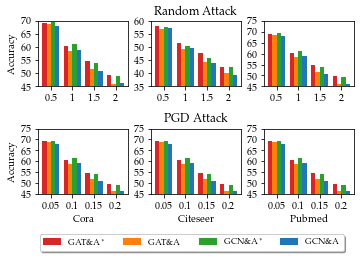

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

def draw_dataset(ax, x, xticklabels, ys, labels, width, ylim, legend=False, x_label=None, y_label=False):
    colors = ['tab:red', 'tab:orange', 'tab:green',  'tab:blue']
    rects1 = ax.bar(x - width/2 - width, ys[0], width, label=labels[0], color=colors[0])
    rects2 = ax.bar(x - width/2, ys[1], width, label=labels[1], color=colors[1])
    rects3 = ax.bar(x + width/2, ys[2], width, label=labels[2], color=colors[2])
    rects4 = ax.bar(x + width/2 + width, ys[3], width, label=labels[3], color=colors[3])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if y_label:
        ax.set_ylabel('Accuracy')
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(ylim[0], ylim[1])
    
    yticks = np.arange(ylim[0], ylim[1]+5, step=5)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)

    if legend:
        for i in range(4):

            # Shrink current axis's height by 10% on the bottom
            # box = ax.get_position()
            # ax.set_position([box.x0, box.y0 + box.height * 0.1,
            #                 box.width, box.height * 0.9])

            # Put a legend below current axis
            ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.55),
                fancybox=True, shadow=False, ncol=5, prop={'size': 9})


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
rn_xticklabels = ['0.5', '1', '1.5', '2']
pgd_xticklabels = ['0.05', '0.1', '0.15', '0.2']
labels = [
    'GAT\&A$^{*}$', 
    'GAT\&A',      
    'GCN\&A$^{*}$', 
    'GCN\&A',    
]
rn_cora = [
    [72.11, 68.33, 71.51, 67.63],
    [64.85, 62.48, 63.90, 58.52],
    [60.38, 55.50, 58.06, 52.86],
    [55.98, 58.93, 52.64, 45.33],
]
rn_citeseer = [
    [62.20, 59.47, 60.92, 57.24],
    [57.17, 52.42, 54.03, 49.48],
    [50.65, 46.35, 48.85, 44.31],
    [45.41, 42.84, 43.68, 40.87],
]
pgd_cora = [
    [78.98,73.64,77.72,72.58]
    [62.50, 59.37, 60.94,56.85]
    [48.17, 43.65, 46.37, 41.99],
    [40.13, 37.33, 36.79, 32.70],
]

pgd_citeseer = [
    [78.98,73.64,77.72,72.58]
    [62.50, 59.37, 60.94,56.85]
    [48.17, 43.65, 46.37, 41.99],
    [40.13, 37.33, 36.79, 32.70],
]
citeseer = [
    [57.41, 49.84, 43.97, 39.31],
    [57.65, 50.35, 45.80, 42.47],
    [57.17, 49.42, 44.45, 40.12],
    [58.20, 51.47, 47.69, 42.55],
]

x = np.array([0, 1, 2, 3])*0.25  # the label locations
width = 0.05  # the width of the bars
def cm2inch(value):
    return value/2.54
figsize=(cm2inch(13),cm2inch(10))

            #'$\varepsilon$ for Random Noise Attack'
fig, axs = plt.subplots(2, 3, figsize=figsize)


draw_dataset(axs[0,0], x, rn_xticklabels, rn_cora, labels, width, [40, 75], y_label=True)
draw_dataset(axs[0,1], x, rn_xticklabels, rn_citeseer, labels, width, [35, 65])
draw_dataset(axs[0,2], x, rn_xticklabels, rn_cora, labels, width, [45, 75])
axs[0,1].set_title('Random Attack')
draw_dataset(axs[1,0], x, pgd_xticklabels, rn_cora, labels, width, [45, 75], x_label='Cora', y_label=True)
draw_dataset(axs[1,1], x, pgd_xticklabels, rn_cora, labels, width, [45, 75], legend=True, x_label='Citeseer')
draw_dataset(axs[1,2], x, pgd_xticklabels, rn_cora, labels, width, [45, 75], x_label='Pubmed')
axs[1,1].set_title('PGD Attack')

fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
# plt.show()
plt.savefig('robust_topo.pdf')

In [44]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

labels = [
    'RN-A GCN',    
    'RN-A$^{*}$ GCN', 
    'PGD-A GCN',    
    'PGD-A$^{*}$ GCN',
    'RN-A GAT',      
    'RN-A$^{*}$ GAT', 
    'PGD-A GAT',
    'PGD-A$^{*}$ GAT',
]


cora = OrderedDict()
for label, y in zip(labels, cora_y):
    cora[label] = y

citeseer_y = [
              [57.41, 49.84, 43.97, 39.31],
              [57.65, 50.35, 45.80, 42.47],
              [61.52, 37.43, 23.41, 20.32],
              [61.69, 38.80, 24.31, 30.07],
              [57.17, 49.42, 44.45, 40.12],
              [58.20, 51.47, 47.69, 42.55],
              [],
              [],
]

citeseer = OrderedDict()
for label, y in zip(labels, citeseer_y):
    citeseer[label] = y
pubmed_y = [
            [57.41, 49.84, 43.97, 39.31],
            [57.65, 50.35, 45.80, 42.47],
            [],
            [],
            [57.17, 49.42, 44.45, 40.12],
            [58.20, 51.47, 47.69, 42.55],
            [],
            [],
]
pubmed = OrderedDict()
for label, y in zip(labels, pubmed_y):
    pubmed[label] = y

datasets = [cora, citeseer, pubmed]
dataset_names = ['Cora', 'Citeseer', 'Pubmed']
rn_ticks =  [0.5, 1.0, 1.5, 2]
pgd_ticks = [0.05, 0.1, 0.15, 0.2]
markers = ['o', 'o', 'x', 'x', 's', 's', '^', '^'] # circle o, x x, square s, triangle up ^
colors = ['tab:red', 'tab:red', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:blue', 'tab:blue']
line_styles = ['dashed', 'solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed', 'solid']

def cm2inch(value):
    return value/2.54
figsize=(cm2inch(10),cm2inch(8))

fig, axs = plt.subplots(1, len(datasets), figsize=figsize)
for i, (ax, dataset_name, dataset) in enumerate(zip(list(axs), dataset_names, datasets)):
    i, dataset_name, dataset
    for j, (label, y) in enumerate(dataset.items()):
        if y:
            ax.plot(rn_ticks, y, c=colors[j], marker=markers[j], markersize=4, ls=line_styles[j],label=label)
            ax.set(xlabel=dataset_name)
        ax.set_xticks(rn_ticks, minor=False)
axs[0].legend()
fig.tight_layout()
        #'$\varepsilon$ for Random Noise Attack'
plt.savefig('robust_topo.pdf')


NameError: name 'cora_y' is not defined

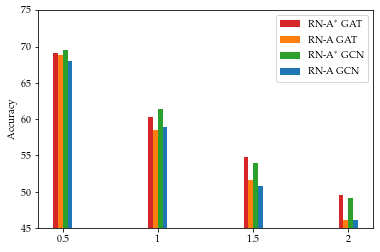

In [99]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

def draw_dataset(x, xticklabels, ys, labels, width):
    colors = ['tab:red', 'tab:orange', 'tab:green',  'tab:blue']
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2 - width, ys[0], width, label=labels[0], color=colors[0])
    rects2 = ax.bar(x - width/2, ys[1], width, label=labels[1], color=colors[1])
    rects3 = ax.bar(x + width/2, ys[2], width, label=labels[2], color=colors[2])
    rects4 = ax.bar(x + width/2 + width, ys[3], width, label=labels[3], color=colors[3])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    # ax.set_title('Scores by group and gender')
    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(45, 75)
    ax.legend()

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

xticklabels = ['0.5', '1', '1.5', '2']
cora_y = [  
            [69.11, 60.33, 54.76, 49.53],
            [68.85, 58.48, 51.56, 46.06],
            [69.50, 61.38, 53.91, 49.06],
            [67.98, 58.93, 50.80, 46.08],
        ]
labels = [
    'RN-A$^{*}$ GAT', 
    'RN-A GAT',      
    'RN-A$^{*}$ GCN', 
    'RN-A GCN',    
]

x = np.array([0, 1, 2, 3])  # the label locations
width = 0.05  # the width of the bars

draw_dataset(x, xticklabels, cora_y, labels, width)
# fig.tight_layout()

# plt.show()
plt.savefig('robust_topo.pdf')

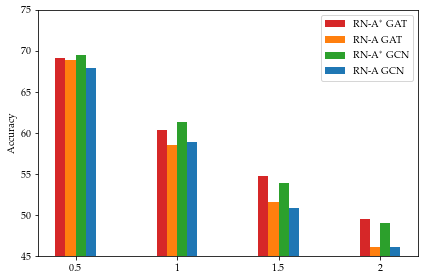

In [81]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
# Enable Tex mode for matplot lib
import matplotlib as mpl
try:
    import subprocess
    subprocess.check_call(["latex"])
except:
    import os 
    os.environ["PATH"] += os.pathsep + '/usr/bin/latex /usr/share/man/man1/latex.1.gz'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


cora_y = [  
            [69.11, 60.33, 54.76, 49.53],
            [68.85, 58.48, 51.56, 46.06],
            [69.50, 61.38, 53.91, 49.06],
            [67.98, 58.93, 50.80, 46.08],
        ]
x_ticks = ['0.5', '1', '1.5', '2']
labels = [
    'RN-A$^{*}$ GAT', 
    'RN-A GAT',      
    'RN-A$^{*}$ GCN', 
    'RN-A GCN',    
]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars


colors = ['tab:red', 'tab:orange', 'tab:green',  'tab:blue']
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - width, cora_y[0], width, label=labels[0], color=colors[0])
rects2 = ax.bar(x - width/2, cora_y[1], width, label=labels[1], color=colors[1])
rects3 = ax.bar(x + width/2, cora_y[2], width, label=labels[2], color=colors[2])
rects4 = ax.bar(x + width/2 + width, cora_y[3], width, label=labels[3], color=colors[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_ylim(45, 75)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

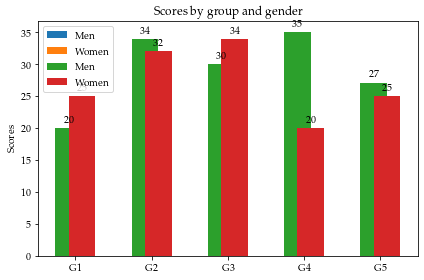

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

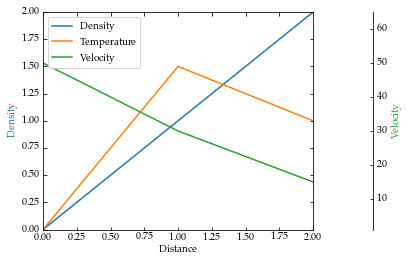

In [2]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

#plt.savefig("Test")

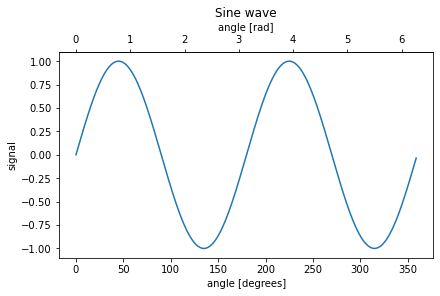

<function __main__.deg2rad(x)>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

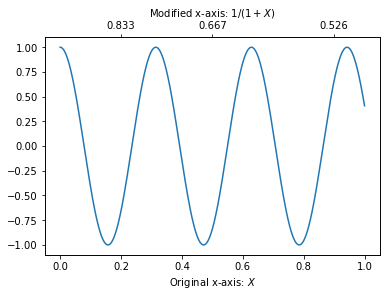

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = np.linspace(0,1,1000)
Y = np.cos(X*20)

ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")

new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
plt.show()

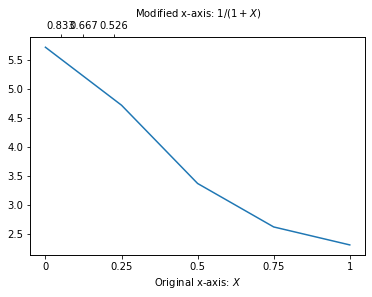

In [5]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X =['0','0.25','0.5','0.75','1']
Y = [5.72, 4.72, 3.37, 2.62, 2.31]

# 0.05 0.2
# 0.5 2.0
ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")

new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
plt.show()